#Multi-group Neutronics Algorithm

In [80]:
%reset -f

###Importing the necessary packages

numpy for arrays

pyplot for plotting

json for loading in the energy data from the xs library


In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Load In the Data

Spectrum Data from a csv obtained from Serpent

Cross-section data from a json obtained from xsplotter

In [7]:
with open('./Core/results/112.0/EnergyBins.csv','rb') as Core,\
open('./Reflctor/results/112.0/EnergyBins.csv','rb') as Reflector,\
open('./Downcomer/results/112.0/EnergyBins.csv','rb') as Downcomer:
    CoreSpectrumData = np.loadtxt(Core,delimiter=',')
    CoreE = CoreSpectrumData[:,0]*1e6 #eV
    CorePhi = CoreSpectrumData[:,1] #n/cm2.s
    ReflectorSpectrumData = np.loadtxt(Reflector,delimiter=',')
    ReflectorE = ReflectorSpectrumData[:,0]*1e6 #eV
    ReflectorPhi = ReflectorSpectrumData[:,1] #n/cm2.s
    DowncomerSpectrumData = np.loadtxt(Downcomer,delimiter=',')
    DowncomerE = DowncomerSpectrumData[:,0]*1e6 #eV
    DowncomerPhi = DowncomerSpectrumData[:,1] #n/cm2.s
    
    


     

###Plotting Setup

x-axis boundaries are determined by the domain of the data sets

Group boundaries are selected based on the shape of the curves. Your multi-group calculations are more meaningful and the algorithm yields better results when group boundaries are placed where the behavior of the neutron spectrum or cross-section changes. For example the boundary between resonance and epithermal neutrons was placed where the neutron flux starts falling off, and the boundary between fast and resonance neutrons was placed at the energy where the $^{135}Xe$ cross-section drops by several orders of magnitude

In [24]:
#Plot Params
xmin,xmax = 5e-6,5e7
lw = 1

#Group Bounds
th = 0.0025
ep = 1
fs = 300
uf = 2e6

#Algorithm for centering group labels
def logmid(a,b):
    return np.sqrt(a*b)

###Plotting the raw spectrum data and cross-section data

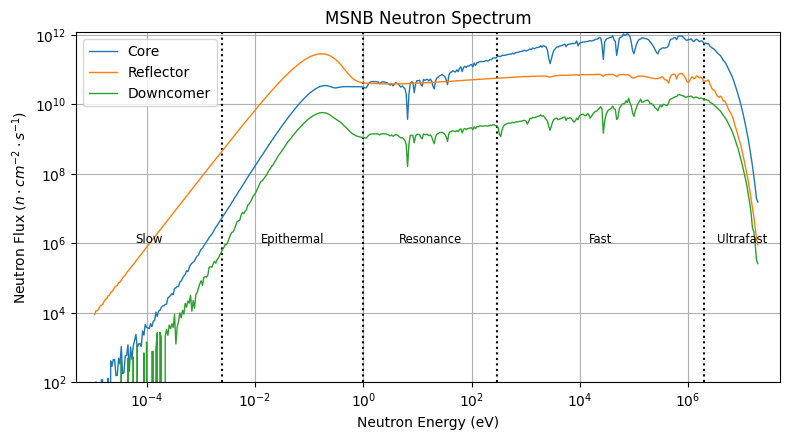

In [36]:
fig,ax = plt.subplots(1,1, figsize=(8,4.5))

#Group Bounds
ax.axvline(th, linestyle='dotted',color='black')
ax.axvline(ep, linestyle='dotted',color='black')
ax.axvline(fs, linestyle='dotted',color='black')
ax.axvline(uf, linestyle='dotted',color='black')

#Group Labels
label_ycoord = 1e6
fontsize = 'small'
ax.text(logmid(xmin,th),label_ycoord,'Slow',horizontalalignment='center',size=fontsize)#
ax.text(logmid(th,ep),label_ycoord,'Epithermal',horizontalalignment='center',size=fontsize)#
ax.text(logmid(ep,fs),label_ycoord,'Resonance',horizontalalignment='center',size=fontsize)#
ax.text(logmid(fs,uf),label_ycoord,'Fast',horizontalalignment='center',size=fontsize)#
ax.text(logmid(uf,xmax),label_ycoord,'Ultrafast',horizontalalignment='center',size=fontsize)

ax.plot(CoreE[1:],CorePhi[1:],linewidth=lw,label='Core')
ax.plot(ReflectorE[1:],ReflectorPhi[1:],linewidth=lw,label='Reflector')
ax.plot(DowncomerE[1:],DowncomerPhi[1:],linewidth=lw,label='Downcomer')
ax.legend(loc='best')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(xmin,xmax)
ax.set_ylim(1e2,0.12e13)
ax.set_ylabel('Neutron Flux ($n\cdot cm^{-2}\cdot s^{-1}$)')
ax.set_xlabel('Neutron Energy (eV)')
ax.set_title('MSNB Neutron Spectrum')
ax.grid()

plt.tight_layout()
plt.savefig('Spectrum.png')
